## Ejercicio 1: Preparación del ambiente de trabajo

- Importe las librerías clásicas a utilizar.
- Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase DecisionTreeRegressor .
- De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
- Elimine la columna 'Unnamed: 0' cuando cargue los datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn')

import lec7_graphs as afx

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

## Ejercicio 2: Feature engineering

- Identifique si el dtype de cada pd.Serie en nuestra base de datos se considera 'object' o no. Para todas las variables que sean 'object' , realice lo siguiente:
     1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
      2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos.
    
  -tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

In [3]:
var_object = []
for i in df.columns:
    if (df[i].dtype ==np.object):
        var_object.append(i)
print(len(var_object))


46


In [4]:
hold_dummies = []
for i in var_object:
    hold_dummies.append(pd.get_dummies(df[i], prefix=df[i].name, prefix_sep='_',drop_first=True))
print(len(hold_dummies))

46


In [5]:
df_trabajo=pd.get_dummies(df, prefix=var_object, prefix_sep='_', dummy_na=False, columns=None, drop_first=True)

df_trabajo.head()

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0


In [6]:
df_trabajo.columns

Index(['Lot_Frontage', 'Lot_Area', 'Year_Built', 'Year_Remod_Add',
       'Mas_Vnr_Area', 'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF',
       'Total_Bsmt_SF', 'First_Flr_SF',
       ...
       'Sale_Type_ConLw', 'Sale_Type_New', 'Sale_Type_Oth', 'Sale_Type_VWD',
       'Sale_Type_WD ', 'Sale_Condition_AdjLand', 'Sale_Condition_Alloca',
       'Sale_Condition_Family', 'Sale_Condition_Normal',
       'Sale_Condition_Partial'],
      dtype='object', length=307)

## Ejercicio 3: Primer modelo

- Genere muestras de entrenamiento y validación con 'Sale_Price' como vector objetivo y los atributos de la base de datos como matriz.
- Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.
- Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
- Comente sobre el desempeño.


In [7]:
X= df_trabajo.drop(columns='Sale_Price')
y= df_trabajo['Sale_Price']
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=.33, random_state=11238)

In [8]:
dec_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [9]:
print("Test MSE:", mean_squared_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test,
dec_tree.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, dec_tree.predict(X_test)).round(5))

Test MSE: 1370370493.57187
Test MAE: 15900.0
Test R2: 0.75889


In [10]:
#el modelo tiene un buen desempeño ya que explica la dispersion en un 74%

## Ejercicio 4: Importancia relativa

- Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
- Comente sobre cuáles son los principales 10 atributos que afectan la predicción de Sale_Price .
- Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.


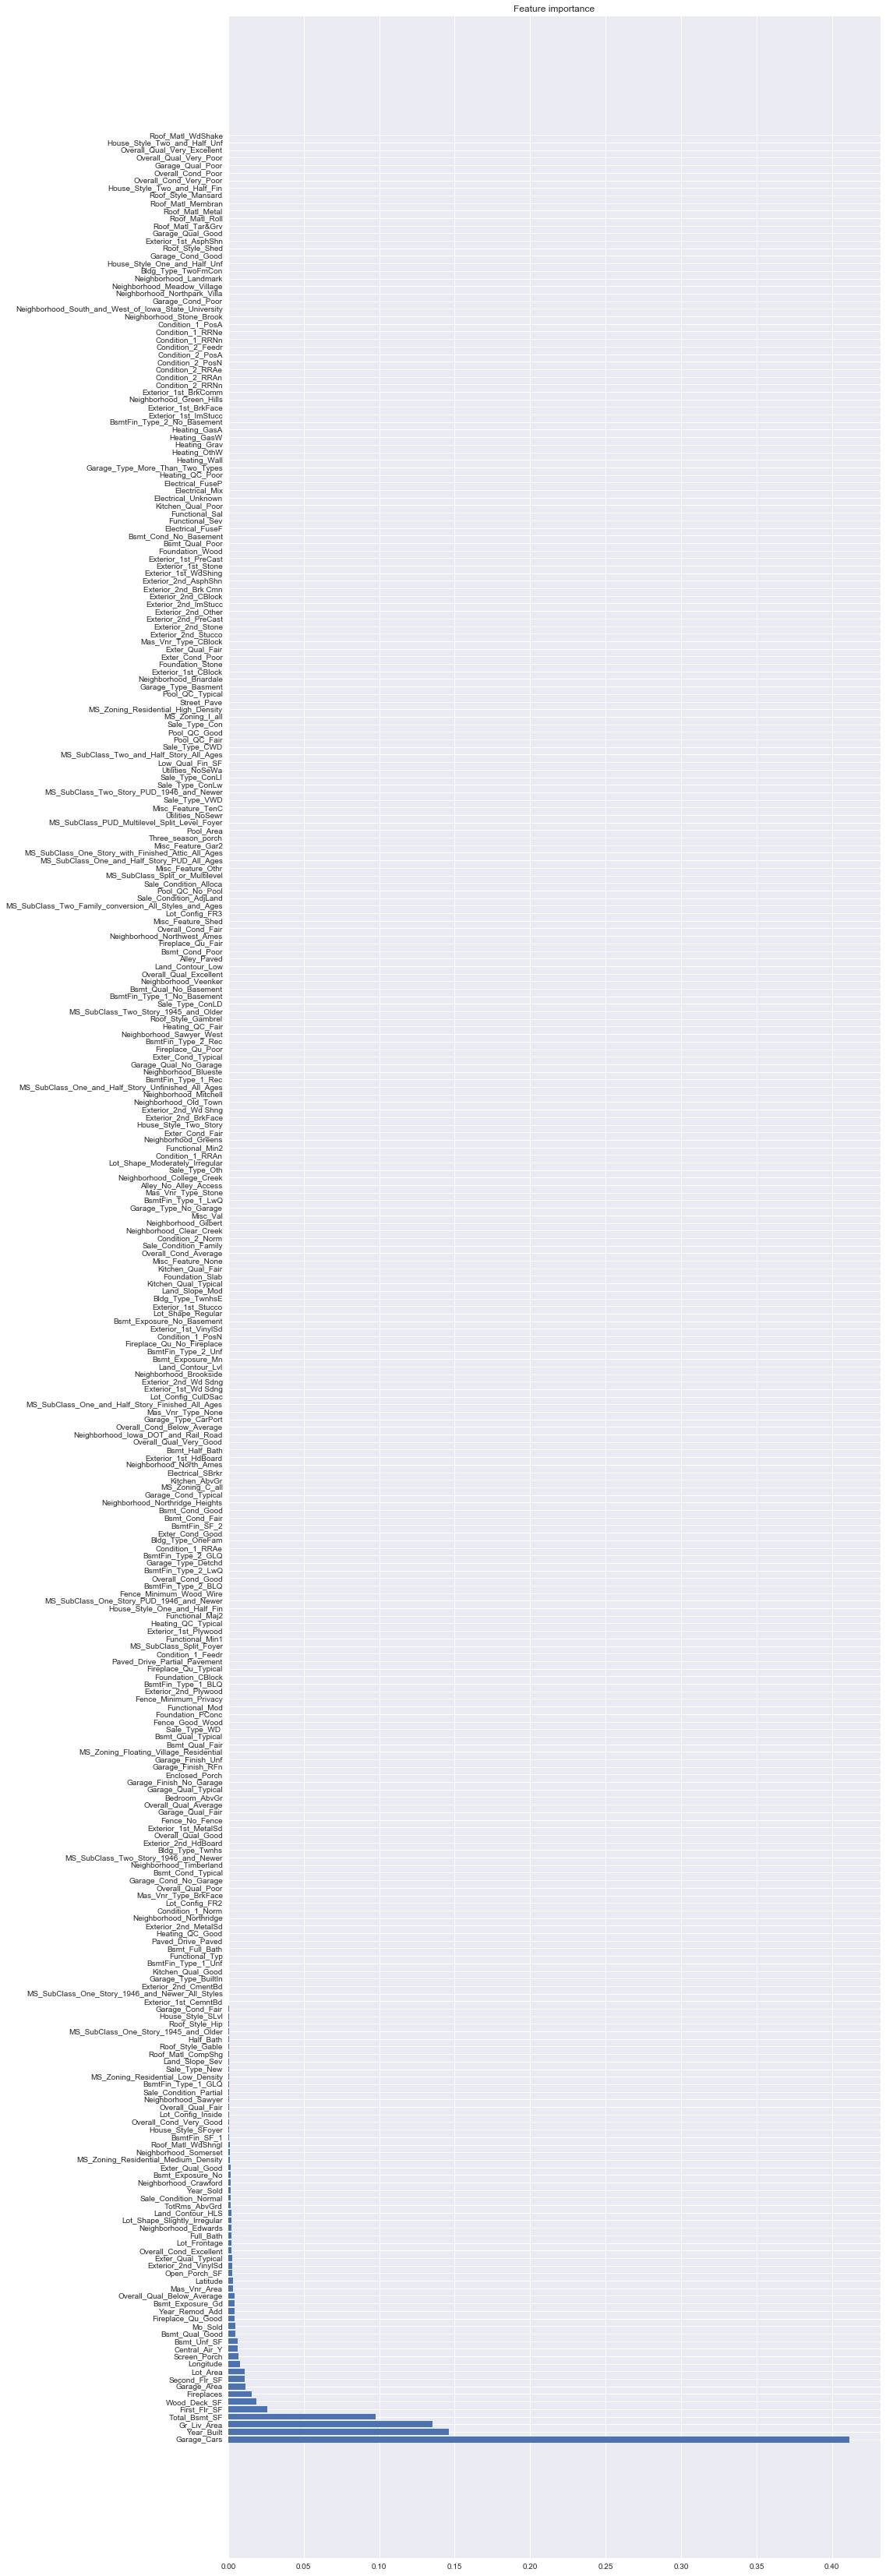

In [11]:
plt.figure(figsize=(15,60))
afx.plot_importance(dec_tree,X.columns)

In [12]:
pd.DataFrame( {"variable":np.array(X.columns), "importancia":dec_tree.feature_importances_}).sort_values(by="importancia",
                                                                                                         ascending=False).head(10)

,variable,importancia
21,Garage_Cars,0.411497
2,Year_Built,0.145998
12,Gr_Liv_Area,0.135153
8,Total_Bsmt_SF,0.097461
9,First_Flr_SF,0.025920
23,Wood_Deck_SF,0.018925
20,Fireplaces,0.015508
22,Garage_Area,0.011438
10,Second_Flr_SF,0.011154
1,Lot_Area,0.011112


## Ejercicio 5: Refactorización del modelo y pickling

- En función de los atributos seleccionados en el ejercicio anterior, vuelva a generar conjuntos de entrenamiento y validación.
- Dentro de los datos de entrenamiento genere una búsqueda de grila con GridSearchCV utilizando los siguientes hiperparámetros:
    - Máximo de atributos: Evalúe todos los posibles atributos.
    - Máximo de profundidad: entre 1 a 32.
    - Validaciones cruzadas : 5.
- Reporte la mejor combinación de hiperparámetros y su desempeño asociado. Compare el desempeño en la muestra de validación con el modelo por defecto.

Pickling

- Ahora generaremos una serialización de nuestro modelo depurado, y nuestros conjuntos de entrenamiento y validación depurados. Para ello importe el módulo pickle .
- pickle contiene la función dump , que permite guardar el modelo desarrollado. La forma canónica para desarrollar el pickling es:
    - pickle.dump(<OBJETO_CON_EL_MODELO>, open('nombre-apellido-actividad07.sav', 'wb'))
- Envíe su modelo y conjuntos de entrenamiento a un compañero.


In [13]:
X = df_trabajo.loc[:,['Garage_Cars', 'Year_Built', 'Gr_Liv_Area', 'Total_Bsmt_SF', 'First_Flr_SF', 'Wood_Deck_SF', 'Fireplaces',
          'Second_Flr_SF', 'Lot_Area', 'Garage_Area']]

In [14]:
y = df_trabajo['Sale_Price']

In [15]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=11238)

In [16]:
get_model_params = GridSearchCV(DecisionTreeRegressor(),
                               {'max_features':list(range(1,X_train.shape[1])),
                               'max_depth': np.linspace(1, 32, num=32, endpoint=True)},
                               cv=5).fit(X_train, y_train)

In [17]:
get_model_params.best_score_

0.774924159382806

In [18]:
get_model_params.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=7.0, max_features=8,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [19]:
import pickle

In [20]:
pickle.dump(get_model_params.best_estimator_, open('esteban_gonzalez-act07.sav', 'wb'))
pickle.dump(X_train, open('esteban_gonzalez-X_train.sav', 'wb'))
pickle.dump(X_test, open('esteban_gonzalez-X_test.sav', 'wb'))
pickle.dump(y_train, open('esteban_gonzalez-y_train.sav', 'wb'))
pickle.dump(y_test, open('esteban_gonzalez-y_test.sav', 'wb'))